[*********************100%%**********************]  1 of 1 completed


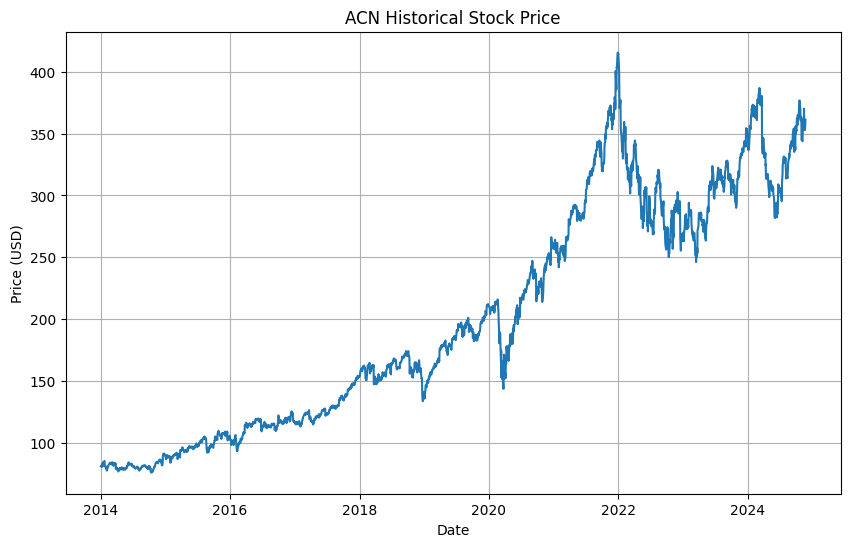

              Open         High          Low        Close    Adj Close  \
count  2742.000000  2742.000000  2742.000000  2742.000000  2742.000000   
mean    200.619132   202.465474   198.889832   200.729829   188.638026   
std      92.703797    93.672526    91.782950    92.702854    94.861683   
min      74.199997    76.190002    73.980003    75.849998    63.707260   
25%     116.027498   116.639999   115.355000   116.035000   102.162329   
50%     177.184998   178.550003   176.105003   178.070007   164.701965   
75%     286.867493   289.014999   284.250008   287.019989   277.195808   
max     416.260010   417.369995   413.679993   415.420013   397.036987   

             Volume  
count  2.742000e+03  
mean   2.330063e+06  
std    1.066280e+06  
min    5.281000e+05  
25%    1.691000e+06  
50%    2.090150e+06  
75%    2.641800e+06  
max    1.490550e+07  


C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

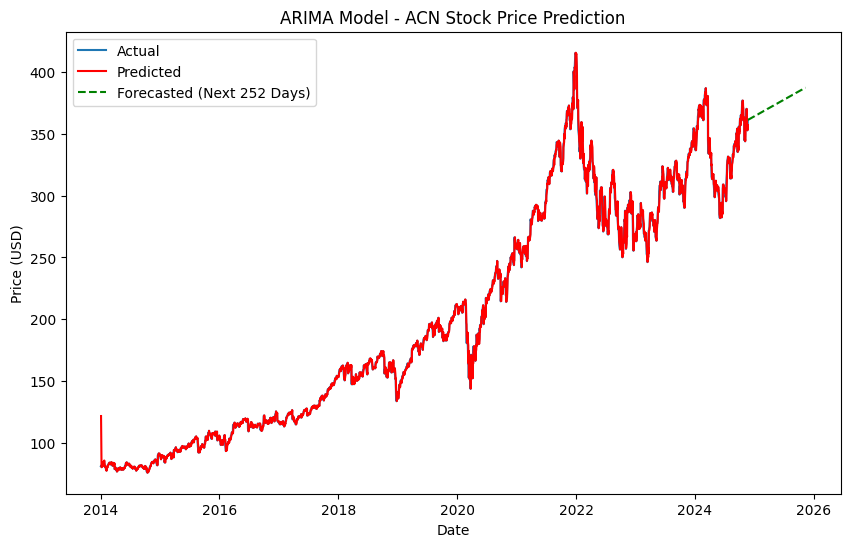

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6.081122316095226e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2.294469983686741e+25
Iteration:      3,   Func. Count:     34,   Neg. LLF: 1487950385.3554733
Iteration:      4,   Func. Count:     47,   Neg. LLF: 1.1533987238200354e+24
Iteration:      5,   Func. Count:     62,   Neg. LLF: 3.938075318781372e+18
Iteration:      6,   Func. Count:     74,   Neg. LLF: -7888.643082114329
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7888.643069403466
            Iterations: 10
            Function evaluations: 74
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7888.64
Distribution:           

C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002324. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


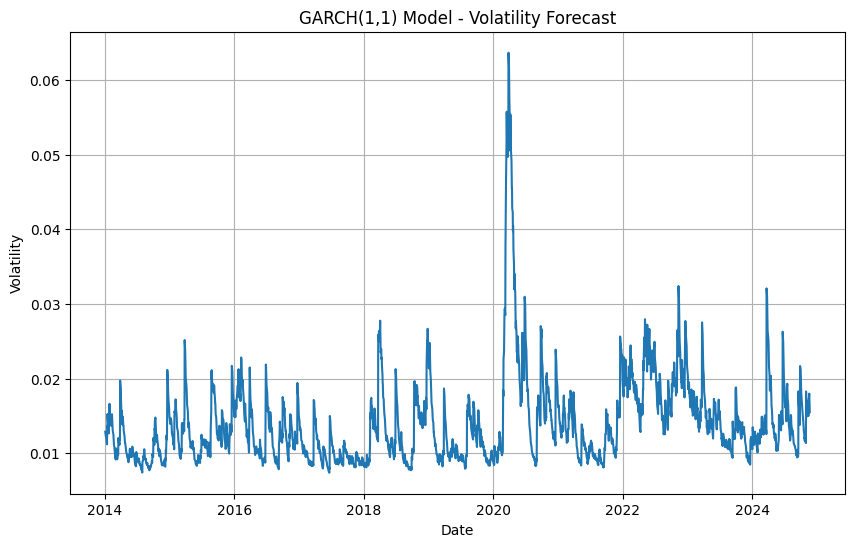

[*********************100%%**********************]  1 of 1 completed


Epoch 1/200
34/34 [==============================] - 21s 372ms/step - loss: 0.0191 - val_loss: 0.0081
Epoch 2/200
34/34 [==============================] - 11s 313ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 3/200
34/34 [==============================] - 12s 365ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 4/200
34/34 [==============================] - 13s 384ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 5/200
34/34 [==============================] - 12s 347ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 6/200
34/34 [==============================] - 12s 343ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 7/200
34/34 [==============================] - 13s 392ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/200
34/34 [==============================] - 13s 380ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 9/200
34/34 [==============================] - 12s 352ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 10/200
34/34 [==============================] - 12s 339ms/step - loss: 0.001

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


stockName = 'ACN'
data = yf.download(stockName, start='2014-01-01')
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(stockName + ' Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
print(data.describe())


# #ARIMA model
stock_price = data['Close']

model = ARIMA(stock_price, order=(1, 2, 1))
model_fit = model.fit()

forecast_steps = 252
forecast_values = model_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=stock_price.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

fitted_values = model_fit.fittedvalues
fitted_values = fitted_values[1:]

plt.figure(figsize=(10, 6))
plt.plot(stock_price, label='Actual')
plt.plot(stock_price.index[1:], fitted_values, color='red', label='Predicted')
plt.plot(forecast_index, forecast_values, color='green', linestyle='dashed', label='Forecasted (Next '+ str(forecast_steps) + ' Days)')
plt.title('ARIMA Model - ' + stockName + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# # GARCH model
returns = stock_price.pct_change().dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

print(garch_fit.summary())

volatility_forecast = garch_fit.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_forecast)
plt.title('GARCH(1,1) Model - Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


#LSTM Model
data = yf.download(stockName, start='2014-01-01')
stock_price = data['Close']

units = 150
layers = 4
dropout_rate = 0.4
learning_rate = 0.001
epochs = 200
batch_size = 64
look_back=90

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_price.values.reshape(-1, 1))

def create_dataset(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back=60)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model
def create_model(units, layers, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model(units=units, layers=layers, dropout_rate=dropout_rate, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('LSTM Model - Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

rmse = math.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE for LSTM: {rmse}")
print(f"MAE for LSTM: {mae}")

[*********************100%%**********************]  1 of 1 completed


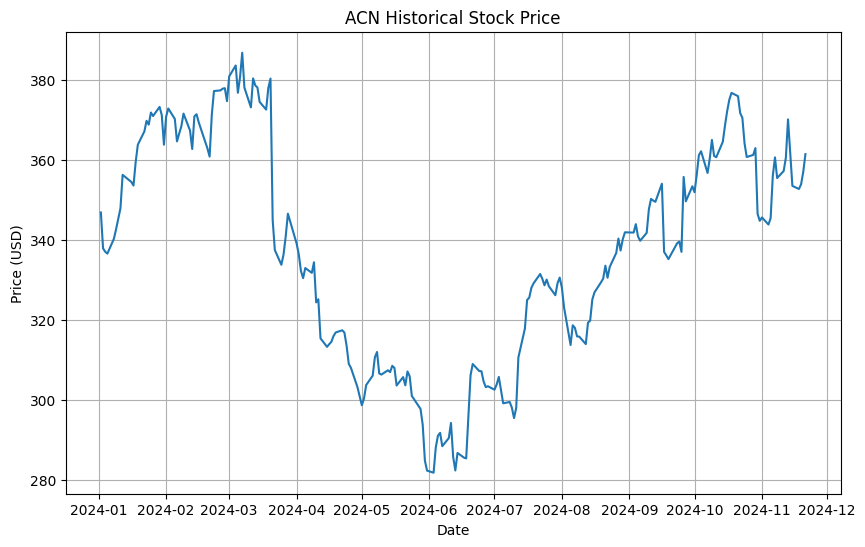

             Open        High         Low       Close   Adj Close  \
count  226.000000  226.000000  226.000000  226.000000  226.000000   
mean   337.636637  340.526460  334.612478  337.465221  334.987360   
std     27.601253   27.735094   27.570350   27.714380   27.467839   
min    281.410004  285.390015  278.690002  281.760010  279.392487   
25%    314.757507  317.357506  311.882500  313.789993  311.450836   
50%    337.970001  340.804993  335.410004  337.710007  335.544205   
75%    361.500000  365.357506  359.524994  361.477501  360.684990   
max    386.690002  387.510010  383.700012  386.910004  382.179138   

             Volume  
count  2.260000e+02  
mean   2.711626e+06  
std    1.529086e+06  
min    6.330790e+05  
25%    1.817025e+06  
50%    2.323950e+06  
75%    3.073875e+06  
max    1.490550e+07  


C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

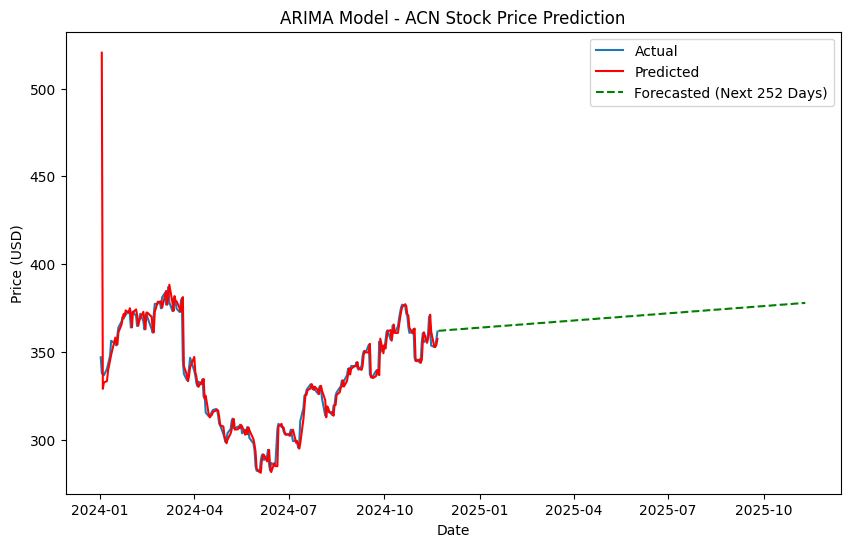

C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002352. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 72992.42283772612
Iteration:      2,   Func. Count:     17,   Neg. LLF: 24.69969009728984
Iteration:      3,   Func. Count:     26,   Neg. LLF: -620.7003249715551
Iteration:      4,   Func. Count:     31,   Neg. LLF: -620.7014062905595
Iteration:      5,   Func. Count:     36,   Neg. LLF: -620.7026134893033
Iteration:      6,   Func. Count:     41,   Neg. LLF: -620.7026283234537
Iteration:      7,   Func. Count:     45,   Neg. LLF: -620.7026283196112
Optimization terminated successfully    (Exit mode 0)
            Current function value: -620.7026283234537
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Li

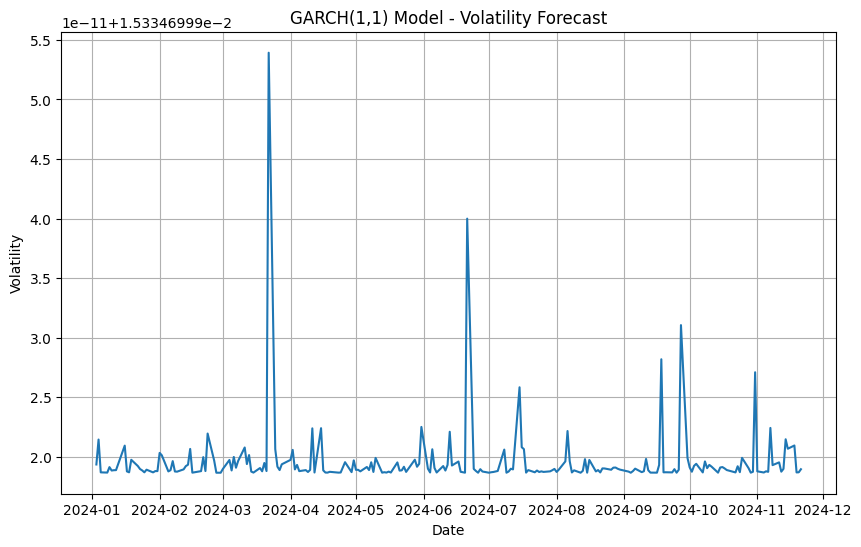

[*********************100%%**********************]  1 of 1 completed


Epoch 1/200


StagingError: in user code:

    File "C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize
        grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients
        grads = tape.gradient(loss, var_list)

    SystemError: <built-in method  of PyCapsule object at 0x0000014E9B887B10> returned a result with an exception set


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


stockName = 'ACN'
data = yf.download(stockName, start='2024-01-01')
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(stockName + ' Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
print(data.describe())


# #ARIMA model
stock_price = data['Close']

model = ARIMA(stock_price, order=(1, 2, 1))
model_fit = model.fit()

forecast_steps = 252
forecast_values = model_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=stock_price.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

fitted_values = model_fit.fittedvalues
fitted_values = fitted_values[1:]

plt.figure(figsize=(10, 6))
plt.plot(stock_price, label='Actual')
plt.plot(stock_price.index[1:], fitted_values, color='red', label='Predicted')
plt.plot(forecast_index, forecast_values, color='green', linestyle='dashed', label='Forecasted (Next '+ str(forecast_steps) + ' Days)')
plt.title('ARIMA Model - ' + stockName + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# # GARCH model
returns = stock_price.pct_change().dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

print(garch_fit.summary())

volatility_forecast = garch_fit.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_forecast)
plt.title('GARCH(1,1) Model - Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


#LSTM Model
data = yf.download(stockName, start='2014-01-01')
stock_price = data['Close']

units = 150
layers = 4
dropout_rate = 0.4
learning_rate = 0.001
epochs = 200
batch_size = 64
look_back=90

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_price.values.reshape(-1, 1))

def create_dataset(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back=60)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model
def create_model(units, layers, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model(units=units, layers=layers, dropout_rate=dropout_rate, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('LSTM Model - '+ stockName +' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

rmse = math.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE for LSTM: {rmse}")
print(f"MAE for LSTM: {mae}")

[*********************100%%**********************]  1 of 1 completed


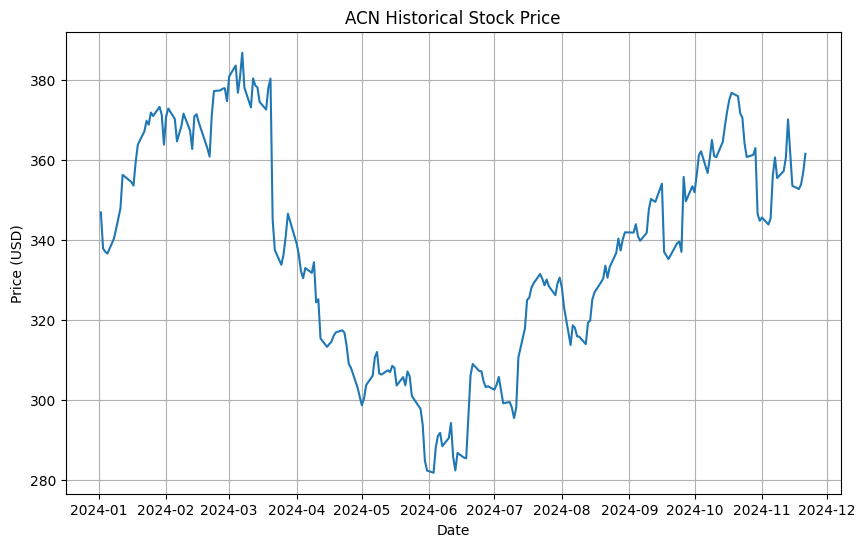

             Open        High         Low       Close   Adj Close  \
count  226.000000  226.000000  226.000000  226.000000  226.000000   
mean   337.636637  340.526460  334.612478  337.465619  334.987759   
std     27.601253   27.735094   27.570350   27.714728   27.468227   
min    281.410004  285.390015  278.690002  281.760010  279.392487   
25%    314.757507  317.357506  311.882500  313.789993  311.450836   
50%    337.970001  340.804993  335.410004  337.710007  335.544205   
75%    361.500000  365.357506  359.524994  361.544998  360.684990   
max    386.690002  387.510010  383.700012  386.910004  382.179138   

             Volume  
count  2.260000e+02  
mean   2.711633e+06  
std    1.529075e+06  
min    6.348680e+05  
25%    1.817025e+06  
50%    2.323950e+06  
75%    3.073875e+06  
max    1.490550e+07  


C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

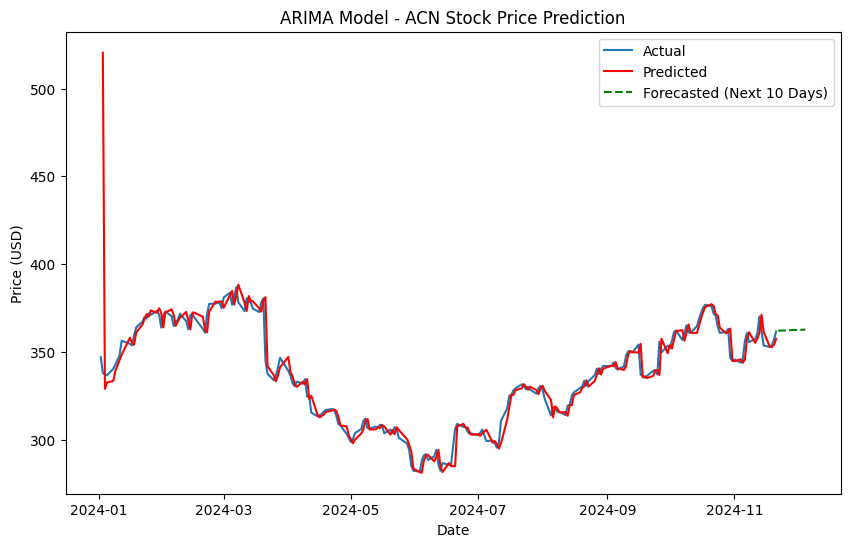

C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002352. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 72786.84940475646
Iteration:      2,   Func. Count:     17,   Neg. LLF: 16.9609220765295
Iteration:      3,   Func. Count:     26,   Neg. LLF: -620.687123745076
Iteration:      4,   Func. Count:     31,   Neg. LLF: -620.6882066596679
Iteration:      5,   Func. Count:     36,   Neg. LLF: -620.6894158506245
Iteration:      6,   Func. Count:     41,   Neg. LLF: -620.6894310215741
Iteration:      7,   Func. Count:     45,   Neg. LLF: -620.6894310177308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -620.6894310215741
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Like

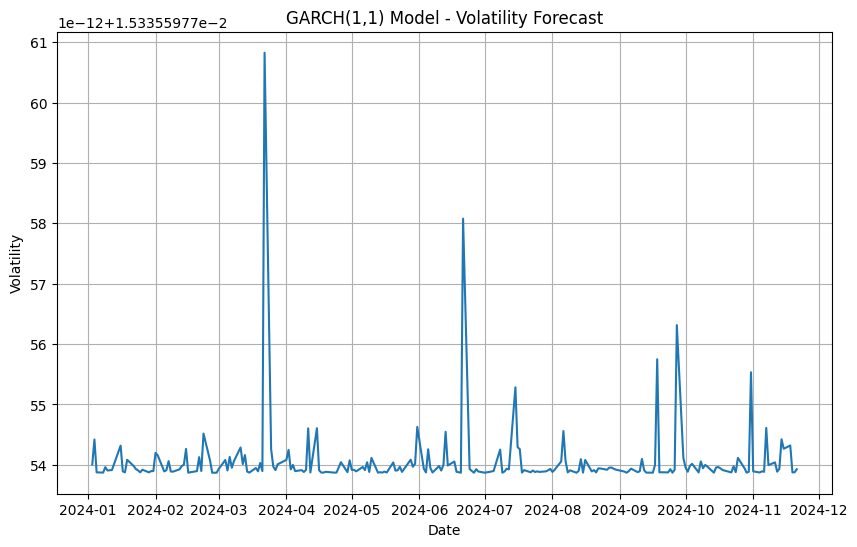

[*********************100%%**********************]  1 of 1 completed


Epoch 1/200
 9/34 [======>.......................] - ETA: 8s - loss: 0.0355

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


stockName = 'ACN'
data = yf.download(stockName, start='2024-01-01')
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(stockName + ' Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
print(data.describe())


# #ARIMA model
stock_price = data['Close']

model = ARIMA(stock_price, order=(1, 2, 1))
model_fit = model.fit()

forecast_steps = 10
forecast_values = model_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=stock_price.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

fitted_values = model_fit.fittedvalues
fitted_values = fitted_values[1:]

plt.figure(figsize=(10, 6))
plt.plot(stock_price, label='Actual')
plt.plot(stock_price.index[1:], fitted_values, color='red', label='Predicted')
plt.plot(forecast_index, forecast_values, color='green', linestyle='dashed', label='Forecasted (Next '+ str(forecast_steps) + ' Days)')
plt.title('ARIMA Model - ' + stockName + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# # GARCH model
returns = stock_price.pct_change().dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

print(garch_fit.summary())

volatility_forecast = garch_fit.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_forecast)
plt.title('GARCH(1,1) Model - Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


#LSTM Model
data = yf.download(stockName, start='2014-01-01')
stock_price = data['Close']

units = 150
layers = 4
dropout_rate = 0.4
learning_rate = 0.001
epochs = 200
batch_size = 64
look_back=90

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_price.values.reshape(-1, 1))

def create_dataset(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back=60)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model
def create_model(units, layers, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model(units=units, layers=layers, dropout_rate=dropout_rate, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('LSTM Model - '+ stockName +' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

rmse = math.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE for LSTM: {rmse}")
print(f"MAE for LSTM: {mae}")

[*********************100%%**********************]  1 of 1 completed


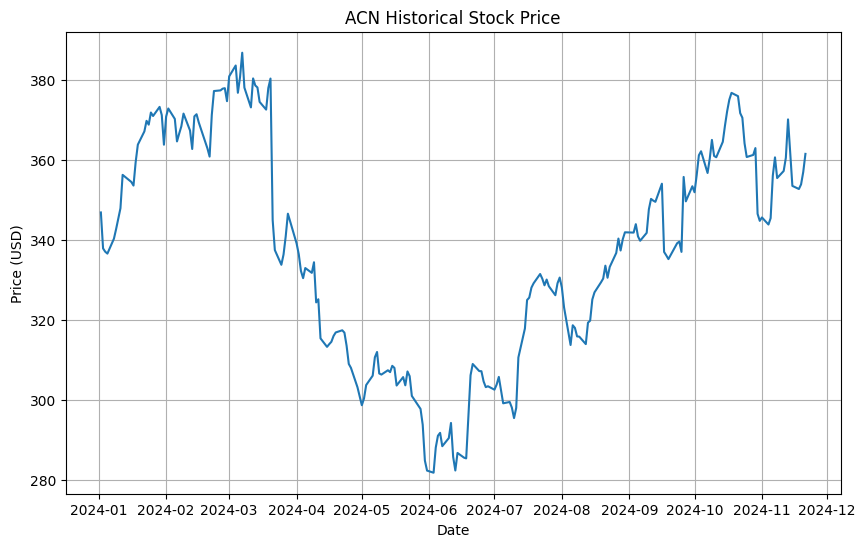

             Open        High         Low       Close   Adj Close  \
count  226.000000  226.000000  226.000000  226.000000  226.000000   
mean   337.636637  340.526460  334.612478  337.465464  334.987604   
std     27.601253   27.735094   27.570350   27.714593   27.468076   
min    281.410004  285.390015  278.690002  281.760010  279.392487   
25%    314.757507  317.357506  311.882500  313.789993  311.450836   
50%    337.970001  340.804993  335.410004  337.710007  335.544205   
75%    361.500000  365.357506  359.524994  361.518745  360.684990   
max    386.690002  387.510010  383.700012  386.910004  382.179138   

             Volume  
count  2.260000e+02  
mean   2.711636e+06  
std    1.529072e+06  
min    6.353340e+05  
25%    1.817025e+06  
50%    2.323950e+06  
75%    3.073875e+06  
max    1.490550e+07  


C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

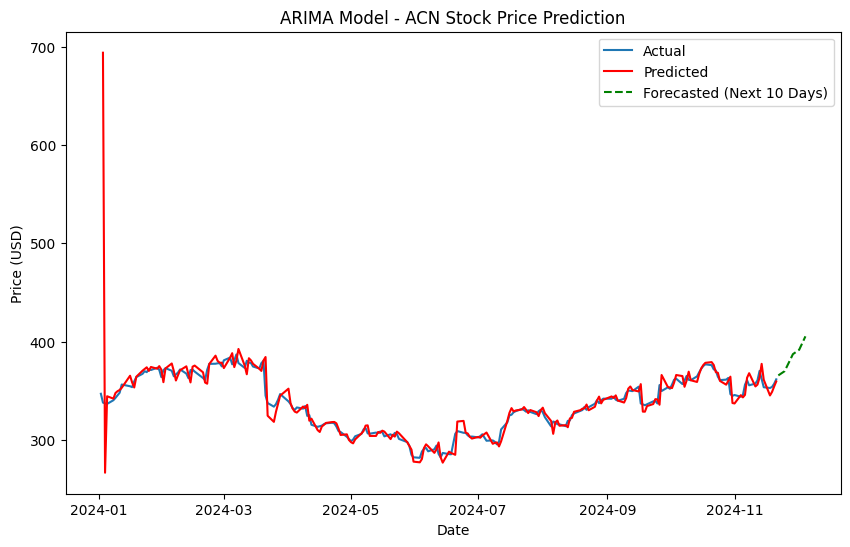

C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002352. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 74322.20324799325
Iteration:      2,   Func. Count:     17,   Neg. LLF: 22.406234319601793
Iteration:      3,   Func. Count:     26,   Neg. LLF: -620.6922856215215
Iteration:      4,   Func. Count:     31,   Neg. LLF: -620.6933735540849
Iteration:      5,   Func. Count:     36,   Neg. LLF: -620.694577181247
Iteration:      6,   Func. Count:     41,   Neg. LLF: -620.6945957024848
Iteration:      7,   Func. Count:     45,   Neg. LLF: -620.6945956986458
Optimization terminated successfully    (Exit mode 0)
            Current function value: -620.6945957024848
            Iterations: 7
            Function evaluations: 45
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Li

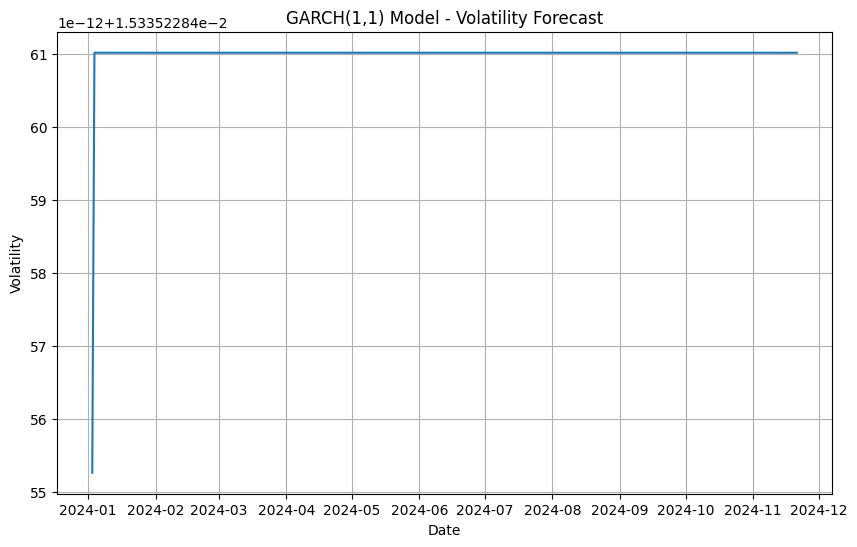

[*********************100%%**********************]  1 of 1 completed


Epoch 1/200
 4/34 [==>...........................] - ETA: 9s - loss: 0.0602

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


stockName = 'ACN'
data = yf.download(stockName, start='2024-01-01')
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(stockName + ' Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
print(data.describe())


# #ARIMA model
stock_price = data['Close']

model = ARIMA(stock_price, order=(1, 3, 1))
model_fit = model.fit()

forecast_steps = 10
forecast_values = model_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=stock_price.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

fitted_values = model_fit.fittedvalues
fitted_values = fitted_values[1:]

plt.figure(figsize=(10, 6))
plt.plot(stock_price, label='Actual')
plt.plot(stock_price.index[1:], fitted_values, color='red', label='Predicted')
plt.plot(forecast_index, forecast_values, color='green', linestyle='dashed', label='Forecasted (Next '+ str(forecast_steps) + ' Days)')
plt.title('ARIMA Model - ' + stockName + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# # GARCH model
returns = stock_price.pct_change().dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

print(garch_fit.summary())

volatility_forecast = garch_fit.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_forecast)
plt.title('GARCH(1,1) Model - Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


#LSTM Model
data = yf.download(stockName, start='2014-01-01')
stock_price = data['Close']

units = 150
layers = 4
dropout_rate = 0.4
learning_rate = 0.001
epochs = 200
batch_size = 64
look_back=90

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_price.values.reshape(-1, 1))

def create_dataset(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back=60)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model
def create_model(units, layers, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model(units=units, layers=layers, dropout_rate=dropout_rate, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('LSTM Model - '+ stockName +' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

rmse = math.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE for LSTM: {rmse}")
print(f"MAE for LSTM: {mae}")

[*********************100%%**********************]  1 of 1 completed


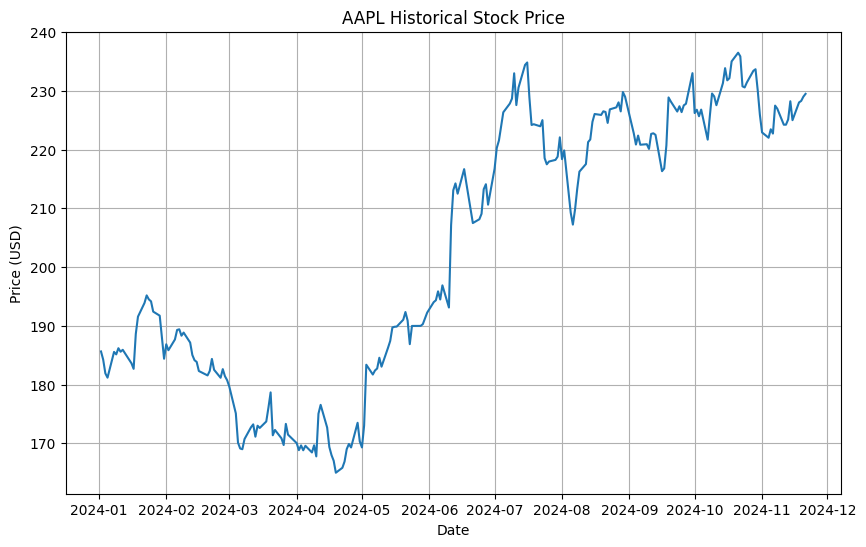

             Open        High         Low       Close   Adj Close  \
count  226.000000  226.000000  226.000000  226.000000  226.000000   
mean   202.543407  204.448275  200.757878  202.703584  202.217603   
std     22.784217   22.993221   22.458302   22.827875   22.996280   
min    165.350006  166.399994  164.080002  165.000000  164.405121   
25%    182.522495  184.532505  181.327507  182.694996  181.998959   
50%    202.195000  210.685005  198.535004  207.360001  206.892647   
75%    224.975002  226.897499  223.209999  225.092495  225.089996   
max    236.479996  237.490005  234.449997  236.479996  236.220108   

             Volume  
count  2.260000e+02  
mean   5.823938e+07  
std    3.138791e+07  
min    2.239934e+07  
25%    4.230888e+07  
50%    5.083035e+07  
75%    6.474120e+07  
max    3.186799e+08  


C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

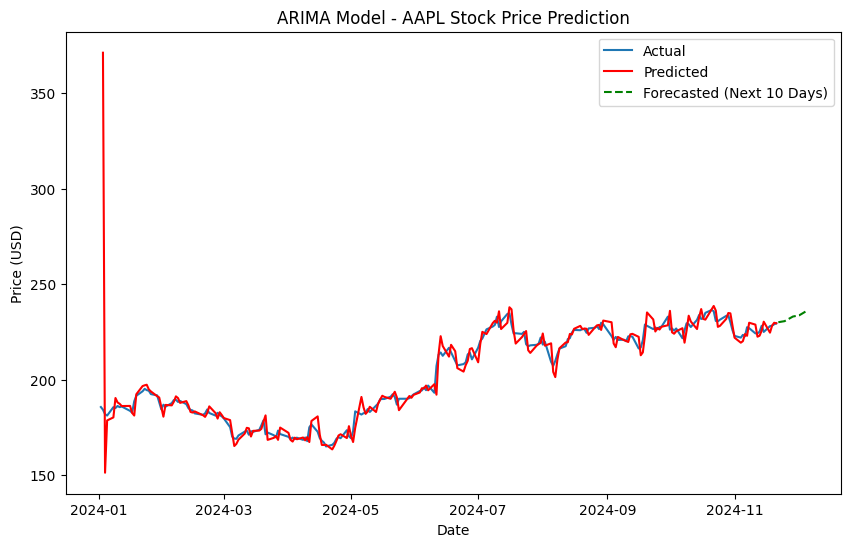

C:\Users\aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002107. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3154599.5649973243
Iteration:      2,   Func. Count:     17,   Neg. LLF: 32244.850141652838
Iteration:      3,   Func. Count:     25,   Neg. LLF: -458.97251395933483
Iteration:      4,   Func. Count:     32,   Neg. LLF: 44330997.393030174
Iteration:      5,   Func. Count:     43,   Neg. LLF: -473.0160753915668
Iteration:      6,   Func. Count:     51,   Neg. LLF: -632.7121270936444
Iteration:      7,   Func. Count:     57,   Neg. LLF: -636.9802252582876
Iteration:      8,   Func. Count:     62,   Neg. LLF: -637.0426706392732
Iteration:      9,   Func. Count:     67,   Neg. LLF: -637.049843362622
Iteration:     10,   Func. Count:     72,   Neg. LLF: -637.051365498827
Iteration:     11,   Func. Count:     77,   Neg. LLF: -637.0514459156401
Iteration:     12,   Func. Count:     81,   Neg. LLF: -637.051445828977
Optimization terminated successfully    (Exit mode 0)
            Current function value: -637.0514459156401
            Itera

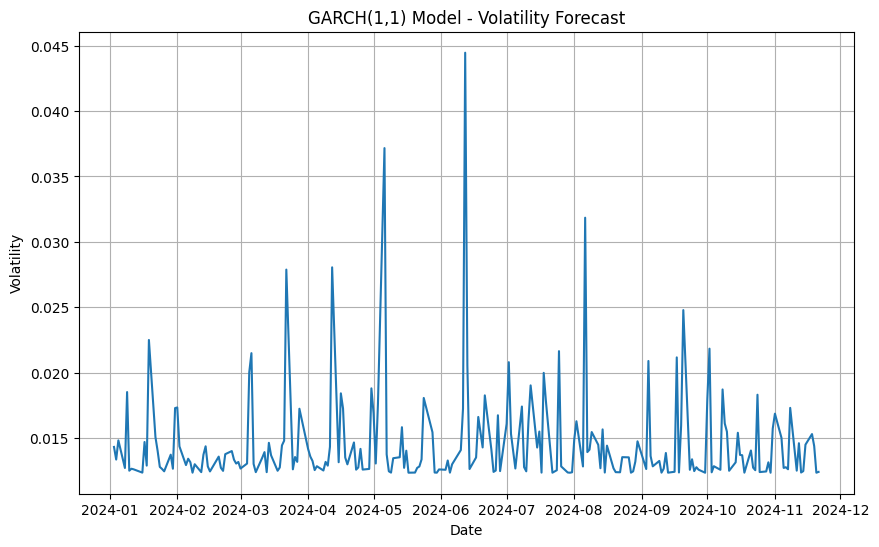

[*********************100%%**********************]  1 of 1 completed


Epoch 1/200
34/34 [==============================] - 22s 394ms/step - loss: 0.0277 - val_loss: 0.0343
Epoch 2/200
34/34 [==============================] - 11s 314ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 3/200
34/34 [==============================] - 11s 318ms/step - loss: 8.2673e-04 - val_loss: 0.0048
Epoch 4/200
34/34 [==============================] - 11s 324ms/step - loss: 8.5436e-04 - val_loss: 0.0027
Epoch 5/200
34/34 [==============================] - 11s 314ms/step - loss: 7.7743e-04 - val_loss: 0.0022
Epoch 6/200
34/34 [==============================] - 12s 345ms/step - loss: 8.6344e-04 - val_loss: 0.0028
Epoch 7/200
34/34 [==============================] - 11s 333ms/step - loss: 9.7955e-04 - val_loss: 0.0025
Epoch 8/200
34/34 [==============================] - 11s 317ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 9/200
34/34 [==============================] - 11s 331ms/step - loss: 8.0112e-04 - val_loss: 0.0036
Epoch 10/200
34/34 [==============================] - 11s 

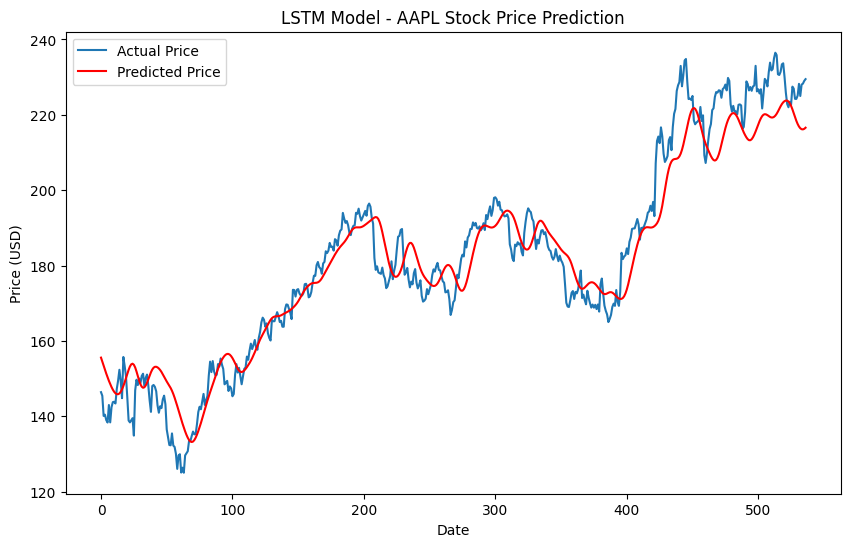

RMSE for LSTM: 7.674759151298462
MAE for LSTM: 6.006552939530414


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


stockName = 'AAPL'
data = yf.download(stockName, start='2024-01-01')
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(stockName + ' Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
print(data.describe())


# #ARIMA model
stock_price = data['Close']

model = ARIMA(stock_price, order=(1, 3, 1))
model_fit = model.fit()

forecast_steps = 10
forecast_values = model_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=stock_price.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

fitted_values = model_fit.fittedvalues
fitted_values = fitted_values[1:]

plt.figure(figsize=(10, 6))
plt.plot(stock_price, label='Actual')
plt.plot(stock_price.index[1:], fitted_values, color='red', label='Predicted')
plt.plot(forecast_index, forecast_values, color='green', linestyle='dashed', label='Forecasted (Next '+ str(forecast_steps) + ' Days)')
plt.title('ARIMA Model - ' + stockName + ' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# # GARCH model
returns = stock_price.pct_change().dropna()
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

print(garch_fit.summary())

volatility_forecast = garch_fit.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility_forecast)
plt.title('GARCH(1,1) Model - Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


#LSTM Model
data = yf.download(stockName, start='2014-01-01')
stock_price = data['Close']

units = 150
layers = 4
dropout_rate = 0.4
learning_rate = 0.001
epochs = 200
batch_size = 64
look_back=90

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_price.values.reshape(-1, 1))

def create_dataset(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, look_back=60)
X = X.reshape(X.shape[0], X.shape[1], 1)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the model
def create_model(units, layers, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(LSTM(units=units, return_sequences=True))
        model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=units))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = create_model(units=units, layers=layers, dropout_rate=dropout_rate, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('LSTM Model - '+ stockName +' Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

rmse = math.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE for LSTM: {rmse}")
print(f"MAE for LSTM: {mae}")